# <center>朴素贝叶斯</center>

<font size=5>Author： TianSong</font>

<font size=5>Date: 20180927</font>

朴素贝叶斯（Naïve Bayes）属于监督学习的生成模型，实现简单，没有迭代，学习效率高，在大样本量下会有较好的表现。但因为假设太强——<font color="red">假设特征条件独立</font>，在输入向量的特征条件有关联的场景下并不适用。

## 朴素贝叶斯为什么是“朴素”的？

朴素贝叶斯算法是基于贝叶斯定理与特征条件独立假设的分类方法，朴素贝叶斯之所以有朴素两个字，就是因为它把问题简化了，假设所有特征参数均相互独立。比如，如果水果呈红色，圆形，直径约3英寸，则可认为它是苹果。 即使这些特征依赖于彼此或者依赖于其他特征的存在，所有这些特征独立地贡献了这种水果是苹果的可能性，这就是为什么它被称为“朴素”的原因。朴素贝叶斯算法很容易构建且对大型数据库非常有用，多用于多元类别下的文本分类问题。

## 朴素贝叶斯的原理

利用贝叶斯定理、全概率公式、条件独立性等进行运算。

![](https://mmbiz.qpic.cn/mmbiz_png/LiaGhAsRNttuPk8rIHM7jGlWkooIsdMyB7mBYmOaevWzPuvjPG4YCbIy6gko6HJ1m5lSAseh42SQIXib6MCfXuYA/640?wx_fmt=png&tp=webp&wxfrom=5&wx_lazy=1&wx_co=1)

事件$c$发生的概率为$P(c)$，即先验概率；事件x发生的概率为$P(x)$；在事件$c$发生的条件下事件x发生的概率为$P(x|c)$；在事件$x$发生的条件下事件$c$发生的概率为$P(c|x)$，其中$P(x|c)P(c)= P(c,x)$，即事件$c$、$x$同时发生的概率。



那么根据贝叶斯定律：在事件$x$发生的条件下事件$c$发生的概率为$P(c|x)$，即后验概率，等于在事件$x$发生的条件下事件$c$、$x$同时发生的概率。



而朴素贝叶斯算法则针对多元分类问题，假设在事件$x_1、x_2…x_n$均发生条件下事件c的概率，这里假设$x_1、x_2…x_n$相互独立，那么$P(x|c)$的概率就可以计算为：$P(x|c)= P(x_1|c) P(x_2|c)* … *P(x_n|c)$。

## 朴素贝叶斯分类器的主要思路

通过联合概率$P(x,y)=P(x|y)P(y)$建模，运用贝叶斯定理求解后验概率$P(y|x)$,将后验概率最大者对应的的类别作为预测类别。

### 分类方法

首先，我们定义训练集$T = \{(x_1,y_1),(x_2,y_2),(x_3,y_3),...,(x_n,y_n)\}$，其类别$y_i \in \{c_1,c_2,...,c_k\}$，则训练集中样本点数为$n$，类别数为$k$。

输入待预测数据$X$，则预测类别

$$arg \max \limits_{c_{k}}p(y=c_k|x) \qquad \qquad    (1)$$

由贝叶斯定理可知：

$$p(y=c_k|x)=\frac{p(x|y=c_k)p(y=c_k)}{p(x)}$$



对于类别$c_{k}$而言，$p(x)$是恒等的，因此式子$(1)$等价于

$$arg \max \limits_{c_k}p(x|y=c_k)p(y=c_k) \qquad  \qquad (2)$$

从上面式子可以看出：朴素贝叶斯将分类问题转化成了求条件概率与先验概率的最大乘积问题。先验概率$p(y=c_{k})$可通过计算类别的频率得到，但如何计算条件概率$p(x|y=c_{k})$呢？

朴素贝叶斯对条件概率做了条件独立性的假设，即特征条件相互独立。设输入$X$为$n$维特征向量$(x^{(1)},x^{(2)},...,x^{(j)},...,x^{(n)})$，第$j$ 维特征$x^{(j)}$的取值有$S_{j}$个。由概率论的知识可知：

$$p(x|y=c_k)=\prod\limits_jp(x^{(j)}|y=c_k)$$

式子$(2)$等价于

$$arg \max \limits_{c_k}p(y=c_k)\prod\limits_{j}p(x^{(j)}|y=c_k) \qquad \qquad (3)$$

为什么要选择后验概率最大的类别作为预测类别呢？因为后验概率最大化，可以使得期望风险最小化。

### 极大似然估计

在朴素贝叶斯学习中，需要估计先验概率与条件概率，一般时采用极大似然估计。先验概率的极大似然估计：

$$\hat{p}(y=c_k)=\frac{\sum_{i}I(y_i=c_k)}{N}$$

其中，$I$是指示函数，满足括号内条件时为$1$否则为$0$；可以看作为计数。

设第$j$维特征的取值空间为$\{a_{j1},a_{j2},...,a_{jS}\}$，且输入变量的第$j$维$x^{(j)}=a_{jl}$，则条件概率的极大似然估计：

$$\hat{p}(x^{(j)}=a_{jl}|y=c_k)=\frac{\sum\limits_{i}I(x_{i}^{(j)}=a_{jl},y=c_k)}{I(y_i=c_k)}$$

###  贝叶斯估计

在估计先验概率与条件概率时，有可能出现为$0$的情况，则计算得到的后验概率亦为$0$，从而影响分类的效果。因此，需要在估计时做平滑，这种方法被称为贝叶斯估计$（Bayesian estimation）$。先验概率的贝叶斯估计：

$$\hat{p}(y=c_k)=\frac{\sum_{i}I(y_i=c_k)+\lambda}{N+k\lambda}$$

后验概率的贝叶斯估计：

$$\hat{p}(x^{(j)}=a_{jl}|y=c_k)=\frac{\sum\limits_{i}I(x_{i}^{(j)}=a_{jl},y=c_k)+\lambda}{I(y_i=c_k)+S_{j}\lambda}$$

常取$\lambda = 1$，这时被称为$Laplace$平滑$（Laplace smoothing）$。下面提到的拼写检查则用到了$Laplace$平滑——初始时将所有单词的计数置为$1$。



## 朴素贝叶斯的优缺点

### 优点：
（1）对数据的预测是简单、快捷和高效的，特别在多元分类任务；<br>（2）当特征相互独立的假设成立，其预测能力好于逻辑回归等其他算法，适合增量式训练，尤其是数据量超出内存时，我们可以一批批的去增量训练。<br>（3）相比于输入变量为数值变量时，它在分类变量的情况下表现良好，若是数值变量，则需要假设其为正态分布。

### 缺点：
（1）朴素贝叶斯算法的假设条件在实际中往往很难成立，在属性个数比较多或者属性之间相关性较大时，分类效果不好。<br>（2）需要知道先验概率，且先验概率很多时候取决于假设，假设的模型可以有很多种，因此在某些时候会由于假设的先验模型的原因导致预测效果不佳。<br>（3）对输入数据的表达形式很敏感

## 朴素贝叶斯的应用场景

（1）实时预测：朴素贝叶斯算法简单便捷。 因此，它可以用于实时进行预测。

（2）多分类预测：适用于目标变量为多类别的任务，这里我们可以预测多类目标变量的概率。

（3）文本分类/垃圾邮件过滤/情感分析：主要用于文本分类的朴素贝叶斯分类器（由于多类问题和独立规则更好的结果）与其他算法相比具有更高的成功率。 因此，它被广泛用于垃圾邮件过滤（识别垃圾邮件）和情感分析（在社交媒体分析中，识别积极和消极的客户情绪）

（4）推荐系统：朴素贝叶斯分类器和协作过滤一起构建推荐系统，该系统使用机器学习和数据挖掘技术来过滤看不见的信息并预测用户是否会喜欢给定的资源，简单的例子就是淘宝上的商品推荐。

## 朴素贝叶斯的python简单实现

在python的scikit learn库中有朴素贝叶斯的程序包，它包括三种类型：

（1）高斯Gaussian：用于分类，它假定特征遵循正态分布。

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

（2）多项Multinomial：用于离散计数。例如，假设我们有文本分类问题。在这里，我们可以考虑更进一步的伯努利试验，而不是“在文档中出现的词”，而是“计算文档中出现词的频率”，您可以将其视为“在$n$次试验中观察结果数$x_i$出现的次数”。

$$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$$

(3)补充Complement：实现补充朴素贝叶斯（CNB）算法。CNB是标准多项式朴素贝叶斯（MNB）算法的改编，其特别适用于不平衡数据集。具体而言，CNB使用来自每个类的补集的统计来计算模型的权重。CNB的发明人凭经验证明，CNB的参数估计比MNB的参数估计更稳定。此外，CNB在文本分类任务上的表现通常优于MNB（通常相当大）。

$$\begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}
                         {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align}$$

（3）伯努利Bernoulli：如果你的特征向量是0-1分类，二项模型很有用。比如在文本分类，其中“1、0”分别是“词语出现在文档中”和“词语文档不出现在文档中”。

$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$



### 下面以高斯模型为例，其Python代码为：

In [4]:
import numpy as np
from matplotlib import pyplot as plt

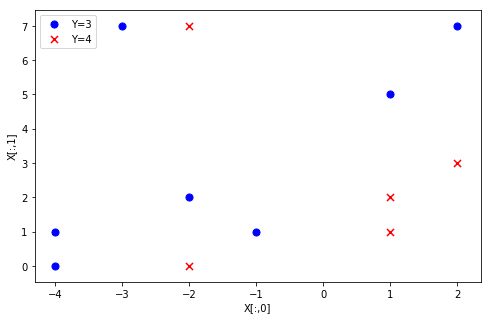

In [6]:
#Import Library of Gaussian Naive Bayes modelfrom sklearn.naive_bayes import GaussianNBimport numpy as np#假设存在这样的二元特征变量x，对应属性Y
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4])
id3 = np.where(Y==3)
id4 = np.where(Y==4)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x[id3,0], x[id3,1],s=50, c='b', marker='o', label='Y=3')
ax.scatter(x[id4,0], x[id4,1], s=50, c='r', marker='x', label='Y=4')
ax.legend()
ax.set_xlabel('X[:,0]')
ax.set_ylabel('X[:,1]')
plt.show()

上图可以看到，我们构造的$x$二元特征变量，在不同Y类别下的散点图分布情况，基本可以看到$Y=3$与$Y=4$两类$x$有一定的线性可分性。



接下来就用高斯分布的朴素贝叶斯去训练该数据集，并对$[1,2]$,$[3,7]$两个测试数据进行类别预测，结果与$Logistic$回归的预测结果进行比较。

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model.logistic import LogisticRegression

In [10]:
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets 
model.fit(x, Y)
#Predict Output 
predicted= model.predict([[1,2],[3,7]])
predicted

array([4, 3])

In [11]:
# LogisticRegression Predict 
classifier=LogisticRegression()
classifier.fit(x, Y)
predictions=classifier.predict([[1,2],[3,7]])
predictions

array([4, 4])

输出结果，朴素贝叶斯结果为$array([4, 3])$，也就是特征变量$[1,2]$,$[3,7]$对应Y取值分别为$4$,$3$；而Logistic回归的预测结果$array([4, 4])$，即两个特征变量的Y取值均为$4$.

由于数据来自我们构造的无法去判断测试集预测结果的准确性，但是我们可以将特征变量$[1,2]$,$[3,7]$放到前边x的分类散点图坐标体系中，初步可以看到朴素贝叶斯的预测相对比较准确。